# Investigating Fandango Movie Ratings

This project will review Fandango's movie rating data, to understand whether ratings are being inflated due to their ratings system as they were identified to be [previously](https://fivethirtyeight.com/features/fandango-movies-ratings/) by Walt Hickey. 

## Understanding the Data

We will review two datasets:
- One containing ratings prior to the analysis by Walt Hickey, and
- Another containing ratings after the analysis

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
pd.options.display.max_rows = 250
previous = pd.read_csv("https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/fandango_score_comparison.csv")
after = pd.read_csv("https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/movie_ratings_16_17.csv")

In [2]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
print(previous.columns,
      after.columns)

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object') Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [5]:
previous_ratings = previous[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()
previous_ratings.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
after_ratings = after[['movie', 'year', 'fandango']].copy()
after_ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


We want to understand whether there has been any change in Fandango's rating system since Hickey's analysis. Therefore we need to look at the two datasets to understand if these samples are representative of our population of interest: the whole data collection by the site (all movie ratings stored on Fandango's website).

The [previous](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) dataset is made up of every film with a [Rotten Tomatoes](https://www.rottentomatoes.com/) (RT) rating, RT user raring, a [Metacritic](https://www.metacritic.com/) (MT) score, MT user score, [IMDb](https://www.imdb.com/) score and at least 30 Fandango fan reviews. 

The [after](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) dataset contains ratings for 214 of the most popular moview released in 2016 and 2017. 

Given there are specific inclusion parameters for whether ratings are included in either dataset, we can reasonably conclude that the methods used for both datasets were [non-probability Sampling](https://en.wikipedia.org/wiki/Nonprobability_sampling). More specifically it appears that Judgmental sampling was used, as data was collected based on what would be appropriate for this analysis. Therefore it is unlikely that the resulting samples are representative of the population (ratings data).

## Changing the Goal of our Analysis

Given what we have identified about our samples, we will need to modify our objectives to try and answer the questions we set out to understand.

We'll no longer try to understand whether there has been a change to Fandango's rating system, and instead analyse if there's been a difference between Fandango's ratings for popular movies in 2015 versus 2016. This should serve as a good proxy for our original goal.

## Isolating the Samples Needed

We want to include popular movies only, using the inclusion criteria defined for the previous dataset i.e. at least 30 fan reviews. We'll review our datasets to check these values exist across them both, and if not we'll use a random sample to check the proportion of movies meeting the criteria. 

In [7]:
previous['Fandango_votes'].value_counts().sort_index()

35       1
36       1
38       2
41       2
42       1
43       2
46       1
48       1
50       1
51       1
54       1
55       1
56       1
59       1
63       1
64       1
66       2
70       1
74       1
79       1
83       2
95       1
99       1
110      1
118      1
121      1
124      1
127      1
162      1
192      1
210      1
218      1
235      1
252      1
259      1
281      1
290      1
308      1
397      1
449      1
450      1
482      1
531      1
540      1
624      1
638      1
675      1
701      1
729      1
804      1
811      2
821      1
864      1
896      1
917      1
973      1
996      1
1021     1
1078     1
1117     1
1196     1
1213     1
1258     1
1333     1
1348     1
1415     1
1430     1
1462     1
1501     1
1651     1
1750     1
1793     1
1834     1
1862     1
1870     1
1896     1
2066     1
2097     1
2195     1
2273     1
2284     1
2435     1
2507     1
2603     1
2618     1
2680     1
2686     1
2704     1
2800     1
3054     1
3223     1

In [8]:
sample = after_ratings['movie'].sample(10, random_state=4)
sample

34                   Central Intelligence
199                         The Wild Life
111                  Miracles from Heaven
18     Batman V Superman: Dawn of Justice
92               Kubo and the Two Strings
1                                13 Hours
165                  The Brothers Grimsby
134       Pride and Prejudice and Zombies
91                     Kong: Skull Island
83                         Jane Got a Gun
Name: movie, dtype: object

By manually checking the number of reviews for each movie in the sample above, we found that all ten have more than 30 reviews. 
The next step is to isolate movies from both datasets by year of release, to ensure we're only analysis those from 2015 and 2016.

In [9]:
previous_2015 = previous[previous['FILM'].str.contains("2015")]
previous_2015['FILM'].value_counts()

Do You Believe? (2015)                                                    1
Mortdecai (2015)                                                          1
While We're Young (2015)                                                  1
Run All Night (2015)                                                      1
Fifty Shades of Grey (2015)                                               1
Saint Laurent (2015)                                                      1
About Elly (2015)                                                         1
Child 44 (2015)                                                           1
Ex Machina (2015)                                                         1
Irrational Man (2015)                                                     1
The Wolfpack (2015)                                                       1
Seymour: An Introduction (2015)                                           1
The Water Diviner (2015)                                                  1
Hitman: Agen

In [10]:
after_2016 = after[after['year'] == 2016]
after_2016['year']

0      2016
1      2016
2      2016
4      2016
5      2016
6      2016
7      2016
8      2016
9      2016
10     2016
11     2016
12     2016
14     2016
15     2016
16     2016
17     2016
18     2016
21     2016
22     2016
24     2016
25     2016
26     2016
27     2016
28     2016
29     2016
30     2016
31     2016
32     2016
33     2016
34     2016
35     2016
36     2016
37     2016
38     2016
39     2016
40     2016
41     2016
42     2016
43     2016
44     2016
45     2016
46     2016
47     2016
49     2016
50     2016
51     2016
52     2016
54     2016
55     2016
57     2016
58     2016
59     2016
60     2016
62     2016
63     2016
64     2016
65     2016
66     2016
67     2016
68     2016
69     2016
70     2016
71     2016
72     2016
73     2016
74     2016
75     2016
76     2016
77     2016
78     2016
79     2016
80     2016
81     2016
82     2016
83     2016
84     2016
86     2016
87     2016
88     2016
89     2016
90     2016
92     2016
93     2016
94  

## Comparing Distribution Shapes for 2015 and 2016 Datasets

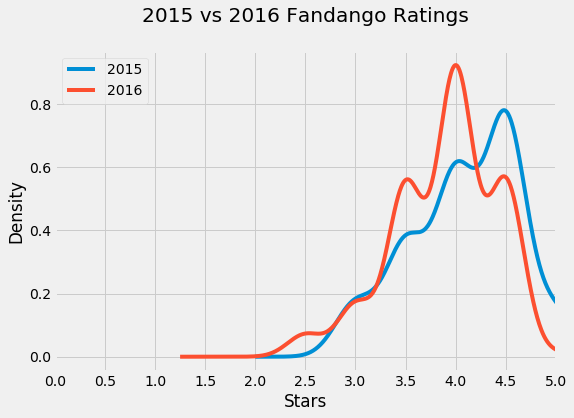

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

previous_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,5.5))
after_2016['fandango'].plot.kde(label='2016', legend=True, figsize=(8,5.5))
plt.title('2015 vs 2016 Fandango Ratings', y= 1.07)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

The kernel density plot above shows us:
- Both datasets are left skewed
- 2016 ratings are more heavily distributed at 3.5 and 4 stars
- 2015 ratings are more heavily distributed at 4.5 and 5 stars

The above suggests that films released in 2016 received lower Fandango star ratings on average compared to films released in 2015. 

## Comparing Relative Frequencies

In [12]:
previous_2015_ft = previous['Fandango_Stars'].value_counts(normalize=True).sort_index()*100
previous_2015_ft

3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [13]:
after_2016_ft = after['fandango'].value_counts(normalize=True).sort_index()*100
after_2016_ft

2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: fandango, dtype: float64

The two tables above, when consolidated below, show a clear difference in distribution of ratings:


|Score   |2015   |2016   |Variance   |
|---|---|---|---|
|2.5   |0   |2.81   |2.81   |
|3.0   |8.22   |8.41   |0.22   |
|3.5   |18.49   |23.36   |4.87   |
|4.0   |28.08   |38.32   |10.24   |
|4.5   |37.67   |26.64   |-11.03   |
|5.0   |7.53   |0.47   |-7.06   |

We can see that movies released in 2016 are much less likely to score above 4.0 compared to movies released in 2015. 

In [16]:
mean_2015 = previous_2015['Fandango_Stars'].mean()
median_2015 = previous_2015['Fandango_Stars'].median()
mode_2015 = previous_2015['Fandango_Stars'].mode()[0]
print(mean_2015, '\n', median_2015, '\n', mode_2015)

4.0852713178294575 
 4.0 
 4.5


In [17]:
mean_2016 = after_2016['fandango'].mean()
median_2016 = after_2016['fandango'].median()
mode_2016 = after_2016['fandango'].mode()[0]
print(mean_2016, '\n', median_2016, '\n', mode_2016)

3.887434554973822 
 4.0 
 4.0


In [19]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


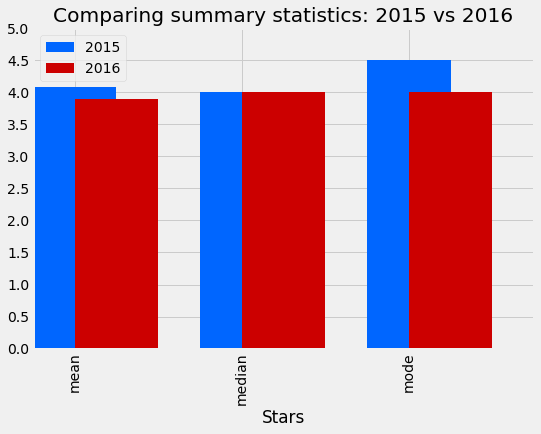

In [27]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(label='2015', legend=True, align='center', color='#0066FF', figsize=(8,5.5))
summary['2016'].plot.bar(label='2016', legend=True, align='edge', color='#CC0000', figsize=(8,5.5))
plt.xlabel('Stars')
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.yticks((arange(0,5.1,.5)))
plt.show()

The grouped barplot shows a slight decrease in the mean score of movies released in 2016 vs 2015, along with a higher mode for 2015 movies in comparison to releases in 2016. 

## Conclusion

By analysing the two datasets we can conclude that movies released in 2016, on average, have a lower Fandango rating than those released in 2015. Without conducting a similar analysis for other movie rating websites such as IMDb or Rotten Tomatoes, it is difficult to say whether this change in ratings on the Fandango site is linked to a different ratings process on their site or simply that movies in 2016 were not as popular as those in 2015. 